# Logistic Regression

## ie8

In [214]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

   age  bought_insurance
0   22                 0
1   25                 0
2   47                 1
3   52                 0
4   46                 1


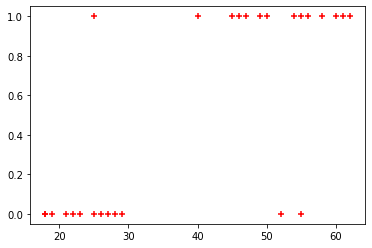

In [215]:
id = pd.read_csv("insurance_data.csv")
print(id.head())
plt.scatter(id.age, id.bought_insurance, marker="+", color="red")

In [216]:
id.shape

(27, 2)

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
np.random.seed(23)
x_train, x_test, y_train, y_test = train_test_split(id[["age"]], id.bought_insurance, train_size=0.7)
print("x_train\n",x_train, "\nx_test\n", x_test, "\ny_train\n", y_train, "\ny_test]n",y_test)

x_train
     age
0    22
15   55
5    56
11   28
2    47
1    25
26   23
20   21
25   54
7    60
12   27
13   29
24   50
22   40
9    61
8    62
6    55
19   18 
x_test
     age
18   19
21   26
4    46
3    52
17   58
16   25
14   49
23   45
10   18 
y_train
 0     0
15    1
5     1
11    0
2     1
1     0
26    0
20    0
25    1
7     1
12    0
13    0
24    1
22    1
9     1
8     1
6     0
19    0
Name: bought_insurance, dtype: int64 
y_test]n 18    0
21    0
4     1
3     0
17    1
16    1
14    1
23    1
10    0
Name: bought_insurance, dtype: int64


In [218]:
x_test

,age
18,19
21,26
4,46
3,52
17,58
16,25
14,49
23,45
10,18


In [219]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
print(model.coef_)
print(model.intercept_)
print(model.predict(x_test))
print(model.score(x_test, y_test))

[[0.18328884]]
[-7.58531384]
[0 0 1 1 1 0 1 1 0]
0.7777777777777778


In [220]:
model.predict_proba(x_test)

array([[0.98374276, 0.01625724],
       [0.94373666, 0.05626334],
       [0.30027833, 0.69972167],
       [0.12502234, 0.87497766],
       [0.0454148 , 0.9545852 ],
       [0.95271365, 0.04728635],
       [0.19847717, 0.80152283],
       [0.34013694, 0.65986306],
       [0.98642844, 0.01357156]])

In [221]:
model.predict([[25]])

array([0], dtype=int64)

In [25]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[12,  0,  0],
       [ 0,  8,  0],
       [ 0,  0, 10]], dtype=int64)

Text(69.0, 0.5, 'Actual')

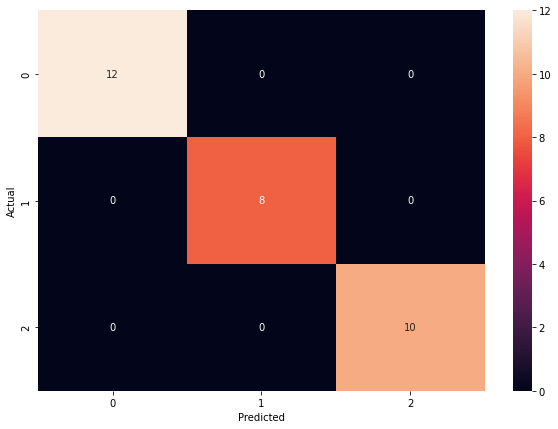

In [26]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

## asgn8

In [195]:
hcs = pd.read_csv("HR_comma_sep.csv")
print(hcs.dtypes)
hcs

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


### data exploration and visualization

In [196]:
print(hcs.shape)
left = hcs[hcs.left==1]
print(left.shape)
retained = hcs[hcs.left==0]
print(retained.shape)
print("retain rate:", str(round(retained.shape[0]/hcs.shape[0]*100,2)) + "%")

(14999, 10)
(3571, 10)
(11428, 10)
retain rate: 76.19%


In [197]:
hcs.groupby("left").mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


1. **Satisfaction Level**: Satisfaction level seems to be relatively low (0.44) in employees leaving the firm vs the retained ones (0.66)
2. **Average Monthly Hours**: Average monthly hours are higher in employees leaving the firm (199 vs 207)
3. **Promotion Last 5 Years**: Employees who are given promotion are likely to be retained at firm

<AxesSubplot:xlabel='Department'>

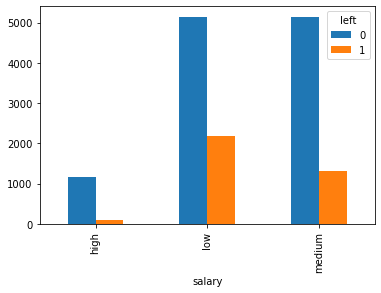

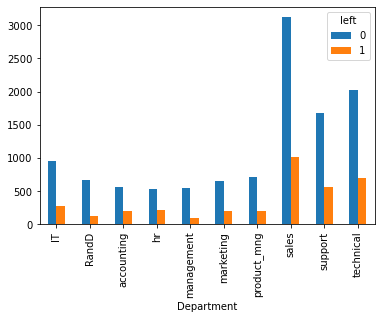

In [198]:
pd.crosstab(hcs.salary,hcs.left).plot(kind='bar') # bar chart shows employees with high salaries are likely to not leave the company
pd.crosstab(hcs.Department,hcs.left).plot(kind='bar')
# From chart there seem to be some impact of department on employee retention but it is not major hence we will ignore department in our analysis

### From the data analysis so far we can conclude that we will use following variables as independant variables in our model
1. **Satisfaction Level**
2. **Average Monthly Hours**
3. **Promotion Last 5 Years**
4. **Salary**

Tackle salary dummy variable

Salary has all text data. It needs to be converted to numbers and we will use dummy variable for that. Check my one hot encoding tutorial to understand purpose behind dummy variables.

In [199]:
subhcs = hcs[["satisfaction_level", "average_montly_hours", "promotion_last_5years", "salary"]]
print(subhcs)
dummies = pd.get_dummies(subhcs.salary)
print(dummies)
merged = pd.concat([subhcs, dummies], axis="columns")
print(merged)

       satisfaction_level  average_montly_hours  promotion_last_5years  salary
0                    0.38                   157                      0     low
1                    0.80                   262                      0  medium
2                    0.11                   272                      0  medium
3                    0.72                   223                      0     low
4                    0.37                   159                      0     low
...                   ...                   ...                    ...     ...
14994                0.40                   151                      0     low
14995                0.37                   160                      0     low
14996                0.37                   143                      0     low
14997                0.11                   280                      0     low
14998                0.37                   158                      0     low

[14999 rows x 4 columns]
       high  low  medium
0

In [200]:
x = merged.drop(["salary", "medium"], axis="columns")
print(x)
y = hcs.left
print(y)

       satisfaction_level  average_montly_hours  promotion_last_5years  high  \
0                    0.38                   157                      0     0   
1                    0.80                   262                      0     0   
2                    0.11                   272                      0     0   
3                    0.72                   223                      0     0   
4                    0.37                   159                      0     0   
...                   ...                   ...                    ...   ...   
14994                0.40                   151                      0     0   
14995                0.37                   160                      0     0   
14996                0.37                   143                      0     0   
14997                0.11                   280                      0     0   
14998                0.37                   158                      0     0   

       low  
0        1  
1        0  


In [208]:
from sklearn.model_selection import train_test_split
import numpy as np
np.random.seed(23)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)
print("x_train\n",x_train, "\nx_test\n", x_test, "\ny_train\n", y_train, "\ny_test\n",y_test)

x_train
        satisfaction_level  average_montly_hours  promotion_last_5years  high  \
5046                 0.53                   138                      0     0   
12050                0.13                   152                      0     0   
6441                 0.50                   155                      0     0   
8105                 0.58                   162                      0     0   
12850                0.75                   133                      0     1   
...                   ...                   ...                    ...   ...   
11190                0.28                    97                      0     0   
10185                0.96                   195                      0     0   
9256                 0.83                   149                      0     0   
13030                0.90                   193                      0     0   
8787                 0.89                   141                      0     0   

       low  
5046     0  
1205

In [209]:
x_test

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low
14439,0.85,236,0,0,1
13733,0.50,266,0,0,0
13253,0.97,208,0,0,1
4135,0.16,205,0,0,1
599,0.11,307,0,0,1
...,...,...,...,...,...
6440,0.14,117,0,0,0
2444,0.91,158,0,0,0
493,0.10,309,0,0,0
10937,0.92,236,1,0,0


In [210]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
model.predict(x_test)

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [211]:
model.score(x_test,y_test)

0.7653333333333333

In [212]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_pred, y_test)
cm

array([[2105,  576],
       [ 128,  191]], dtype=int64)

Text(69.0, 0.5, 'Actual')

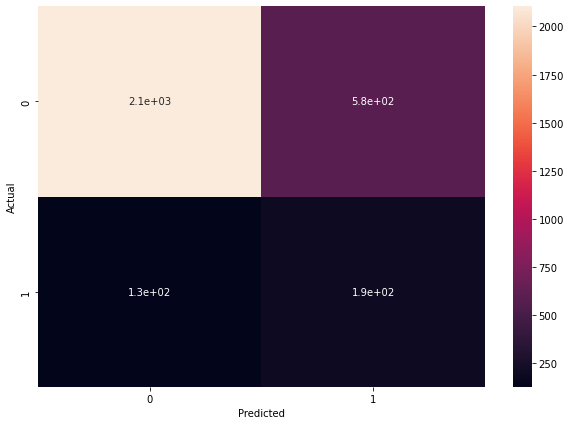

In [213]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [207]:
import pickle
with open("model_pickle", "wb") as f:
    pickle.dump(model, f)
with open("model_pickle", "rb") as f:
    mp = pickle.load(f)
import joblib
joblib.dump(model, "model_joblib")
mj = joblib.load("model_joblib")

# Logistic Regression (Multiclass Classification)

## ie9

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
0
1
2


<Figure size 432x288 with 0 Axes>

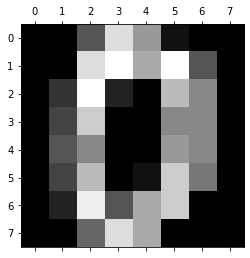

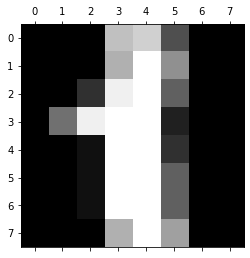

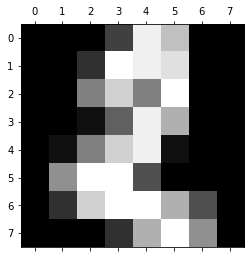

In [2]:
digits = load_digits()
print(dir(digits))
print(digits.data[0])
plt.gray()
for i in range(3):
    plt.matshow(digits.images[i])
    print(digits.target[i])

In [3]:
from sklearn.model_selection import train_test_split
import numpy as np
np.random.seed(23)
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, train_size=0.8)

In [4]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))
print(len(digits.data))
len(x_train)+len(x_test)==len(y_train)+len(y_test)==len(digits.data)

1437
360
1437
360
1797


True

In [5]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9583333333333334

id: 1668
input:
 [ 0.  0.  4. 14. 16. 14.  1.  0.  0.  2. 14. 16. 16.  8.  0.  0.  0.  4.
 16. 16. 14.  3.  0.  0.  0.  4. 16. 16. 10.  0.  0.  0.  0.  0. 12. 13.
 12.  0.  0.  0.  0.  1. 14. 16. 15.  3.  0.  0.  0.  0. 10. 16. 16. 12.
  0.  0.  0.  0.  2.  9. 15. 16.  8.  0.]
output: 1
prediction: 1
[0]
[1]
[2]
[3]
[4]
[5]
[6]
[7]
[8]
[9]


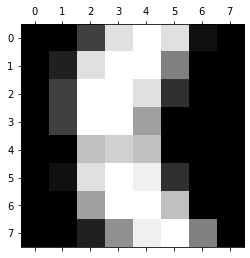

In [6]:
import random
n = random.randint(0,1796)
print("id:", n)
print("input:\n",digits.data[n])
print("output:",digits.target[n])
plt.matshow(digits.images[n])
print("prediction:",int(model.predict([digits.data[n]])))
for i in range(10):
     print(model.predict([digits.data[i]]))

### confusion matrix

In [7]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_pred, y_test)
cm

array([[30,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 38,  0,  0,  1,  1,  0,  0,  1,  0],
       [ 0,  0, 38,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  0,  0,  1,  0,  1],
       [ 0,  0,  0,  0, 38,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 41,  0,  0,  3,  0],
       [ 0,  0,  0,  0,  0,  1, 31,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 27,  1,  1],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 33,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 40]], dtype=int64)

### confusion matrix visualization

Text(69.0, 0.5, 'Actual')

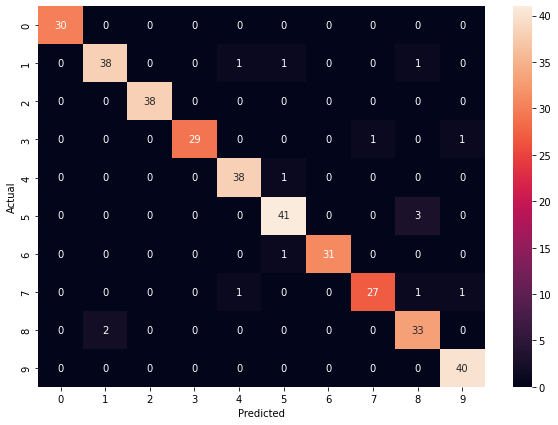

In [8]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

## ie9

### sample

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
iris = datasets.load_iris()
x = iris.data[:, :2]  # we only take the first two features.
y = iris.target
print(x)
print(y)

[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]
 [5.4 3.7]
 [4.8 3.4]
 [4.8 3. ]
 [4.3 3. ]
 [5.8 4. ]
 [5.7 4.4]
 [5.4 3.9]
 [5.1 3.5]
 [5.7 3.8]
 [5.1 3.8]
 [5.4 3.4]
 [5.1 3.7]
 [4.6 3.6]
 [5.1 3.3]
 [4.8 3.4]
 [5.  3. ]
 [5.  3.4]
 [5.2 3.5]
 [5.2 3.4]
 [4.7 3.2]
 [4.8 3.1]
 [5.4 3.4]
 [5.2 4.1]
 [5.5 4.2]
 [4.9 3.1]
 [5.  3.2]
 [5.5 3.5]
 [4.9 3.6]
 [4.4 3. ]
 [5.1 3.4]
 [5.  3.5]
 [4.5 2.3]
 [4.4 3.2]
 [5.  3.5]
 [5.1 3.8]
 [4.8 3. ]
 [5.1 3.8]
 [4.6 3.2]
 [5.3 3.7]
 [5.  3.3]
 [7.  3.2]
 [6.4 3.2]
 [6.9 3.1]
 [5.5 2.3]
 [6.5 2.8]
 [5.7 2.8]
 [6.3 3.3]
 [4.9 2.4]
 [6.6 2.9]
 [5.2 2.7]
 [5.  2. ]
 [5.9 3. ]
 [6.  2.2]
 [6.1 2.9]
 [5.6 2.9]
 [6.7 3.1]
 [5.6 3. ]
 [5.8 2.7]
 [6.2 2.2]
 [5.6 2.5]
 [5.9 3.2]
 [6.1 2.8]
 [6.3 2.5]
 [6.1 2.8]
 [6.4 2.9]
 [6.6 3. ]
 [6.8 2.8]
 [6.7 3. ]
 [6.  2.9]
 [5.7 2.6]
 [5.5 2.4]
 [5.5 2.4]
 [5.8 2.7]
 [6.  2.7]
 [5.4 3. ]
 [6.  3.4]
 [6.7 3.1]
 [6.3 2.3]
 [5.6 3. ]
 [5.5 2.5]
 [5.5 2.6]

In [11]:
x_min, x_max = x[:, 0].min() - 0.5, x[:, 0].max() + 0.5
y_min, y_max = x[:, 1].min() - 0.5, x[:, 1].max() + 0.5
print(x_min, x_max, y_min, y_max)

3.8 8.4 1.5 4.9


Text(0, 0.5, 'Sepal width')

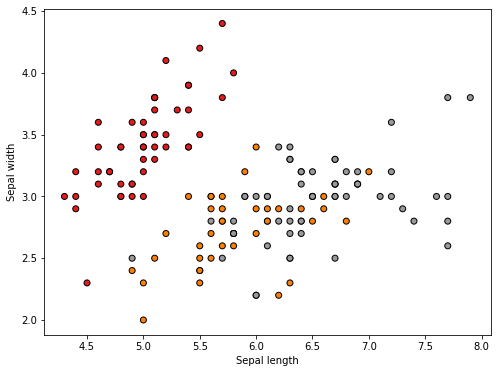

In [13]:
plt.figure(2, figsize=(8, 6))
# A unique identifier for the figure.
# If a figure with that identifier already exists, this figure is made
# active and returned. An integer refers to the ``Figure.number``
# attribute, a string refers to the figure label.
# If there is no figure with the identifier or *num* is not given, a new
# figure is created, made active and returned.  If *num* is an int, it
# will be used for the ``Figure.number`` attribute, otherwise, an
# auto-generated integer value is used (starting at 1 and incremented
# for each new figure). If *num* is a string, the figure label and the
# window title is set to this value.
plt.clf() # Clear the current figure.
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

Text(0, 0.5, 'Sepal width')

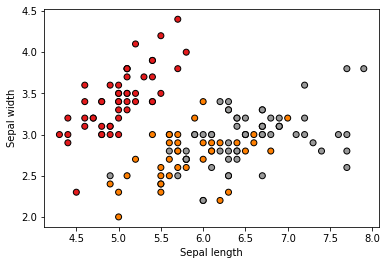

In [15]:
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

([], [])

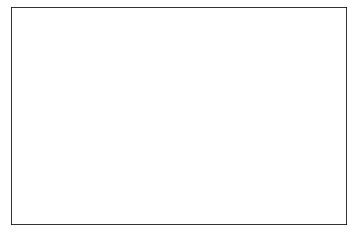

In [16]:
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_27728/2470907844.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, elev=-150, azim=110)


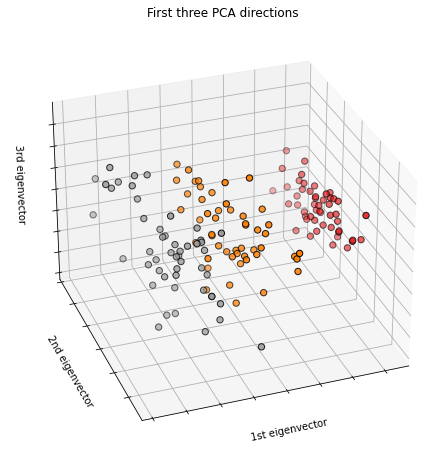

In [17]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=y,
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])
plt.show()

### individual

In [18]:
from sklearn.model_selection import train_test_split
import numpy as np
np.random.seed(23)
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, train_size=0.8)
print(len(x_train))
print(len(x_test))

120
30


In [19]:
x_test

array([[6.9, 3.1, 5.4, 2.1],
       [7.2, 3.2, 6. , 1.8],
       [5.8, 2.7, 4.1, 1. ],
       [4.6, 3.1, 1.5, 0.2],
       [5.7, 2.5, 5. , 2. ],
       [6.9, 3.1, 4.9, 1.5],
       [5.7, 3.8, 1.7, 0.3],
       [6.4, 3.1, 5.5, 1.8],
       [5.4, 3.4, 1.7, 0.2],
       [5.6, 2.9, 3.6, 1.3],
       [6.1, 2.8, 4.7, 1.2],
       [4.8, 3.1, 1.6, 0.2],
       [7.1, 3. , 5.9, 2.1],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.7, 1.5, 0.2],
       [6.3, 2.8, 5.1, 1.5],
       [6.4, 3.2, 4.5, 1.5],
       [6.1, 2.9, 4.7, 1.4],
       [7.7, 3. , 6.1, 2.3],
       [5.2, 3.4, 1.4, 0.2],
       [6.4, 3.2, 5.3, 2.3],
       [4.8, 3. , 1.4, 0.3],
       [5.1, 3.8, 1.6, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [6.7, 3.1, 5.6, 2.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.1, 3.8, 1.9, 0.4],
       [6.2, 2.8, 4.8, 1.8],
       [6.6, 3. , 4.4, 1.4],
       [5.6, 2.5, 3.9, 1.1]])

In [20]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1.0

In [21]:
import random
n = random.randint(0,119)
print("id:", n)
model.predict([iris.data[n]])
print("input:",iris.data[n])
print("output:",iris.target[n])
print("prediction:",int(model.predict([iris.data[n]])))
for i in range(10):
     print(model.predict([iris.data[i]]))

id: 47
input: [4.6 3.2 1.4 0.2]
output: 0
prediction: 0
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


In [22]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_pred, y_test)
cm

array([[12,  0,  0],
       [ 0,  8,  0],
       [ 0,  0, 10]], dtype=int64)

Text(69.0, 0.5, 'Actual')

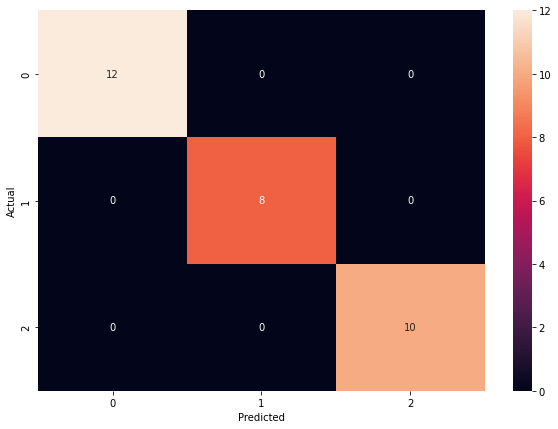

In [23]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [24]:
import pickle
with open("model_pickle", "wb") as f:
    pickle.dump(model, f)
with open("model_pickle", "rb") as f:
    pickle.load(f)
import joblib
joblib.dump(model, "model_joblib")
mj = joblib.load("model_joblib")